In [ ]:
import numpy as np
from sklearn import linear_model

n_samples, n_features = 1, 500

y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)

clf = linear_model.SGDRegressor()

import time
start_time = time.time()

clf.partial_fit(X, y)

elapsed_time = time.time() - start_time
print(f"elapsed_time:{elapsed_time} [sec]")


elapsed_time:0.0012764930725097656 [sec]


In [ ]:
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)

clf.partial_fit(X, y)

SGDRegressor()

##### dedicated online learning(ML) - River
VOWPAL WABBIT - also work in online learning, but mainly used for Reinforcement Learning

In [ ]:
# trivago.com

## Tensor

### 0D Tensor

In [ ]:
import numpy as np

In [ ]:
a= np.array(4)
a

array(4)

In [ ]:
a.ndim

0

### 1D Tensor

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
arr

array([1, 2, 3, 4, 5])

In [ ]:
arr.ndim

1

### 2D Tensor

In [ ]:
mat = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
mat

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
mat.ndim

2

conda create --name campusx
conda activate campusx

conda install -canaconda jupyter
jupyter notebook

conda install numpy


conda remove --name campusx --all

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# !api command from kaggle dataset

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('titanic.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## End to end Toy(Placement) Project

Steps:

1. Pre-process + EDA + Feature Selection
2. Extract input and output columns
3. Scale the values
4. Train Test split
5. Train the model
6. Evaluate the model / Model Selection
7. Deploy the model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/placement-project-logistic-regression/refs/heads/main/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df.shape

(100, 4)

In [ ]:
df = df.iloc[:, 1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

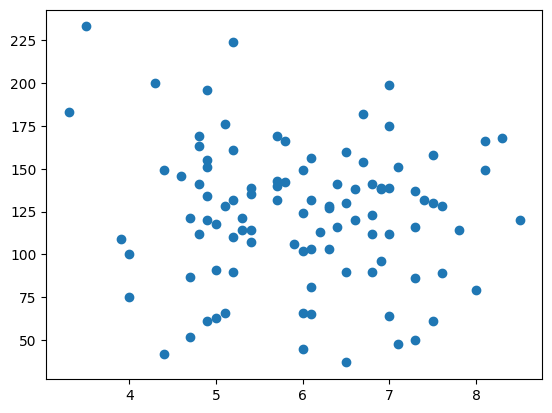

In [ ]:
plt.scatter(df['cgpa'], df['iq'])

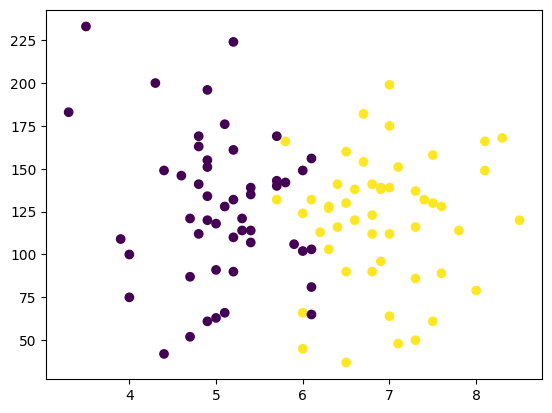

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

In [ ]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 2)
(10, 2)
(90,)
(10,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
y_test

,placement
83,1
53,1
70,1
45,1
44,1
39,0
22,0
80,0
10,1
0,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8

<Axes: >

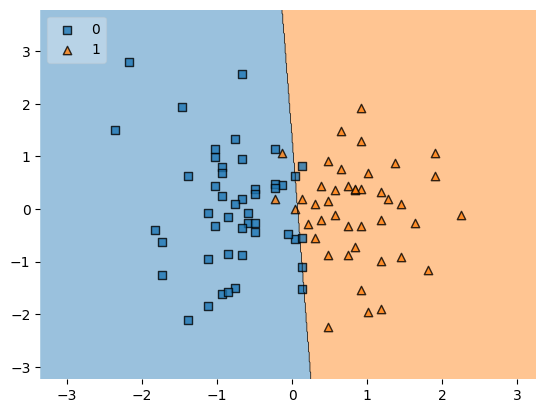

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_scaled, y_train.values, clf = clf, legend = 2) # y_train.values -> here using .values because y_train is not an numpy array, but X_train_scaled is an numpy array because it is scaled

In [ ]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))